/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
2348/2348 [==============================] - 7s 2ms/step - loss: 0.1204 - accuracy: 0.9519 - val_loss: 0.0567 - val_accuracy: 0.9787
Epoch 2/10
2348/2348 [==============================] - 6s 2ms/step - loss: 0.0410 - accuracy: 0.9844 - val_loss: 0.0514 - val_accuracy: 0.9788
Epoch 3/10
2348/2348 [==============================] - 10s 4ms/step - loss: 0.0301 - accuracy: 0.9886 - val_loss: 0.0291 - val_accuracy: 0.9889
Epoch 4/10
2348/2348 [==============================] - 14s 6ms/step - loss: 0.0241 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9899
Epoch 5/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.0212 - accuracy: 0.9919 - val_loss: 0.0213 - val_accuracy: 0.9917
Epoch 6/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.0163 - val_accuracy: 0.9935
Epoch 7/10
2348/2348 [==============================] - 6s 3ms/step - loss: 0.0154 - accuracy: 0.9937 - val_loss: 0.0171 - val_accurac

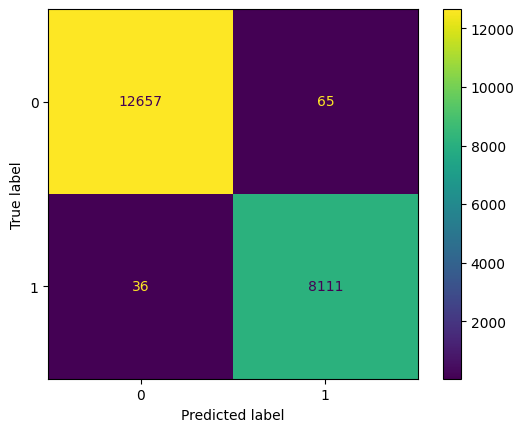

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay

df_sample = pd.read_csv('/content/dataset_sdn.csv')

X = df_sample.drop('label', axis=1)
y = df_sample['label']

numeric_cols = [col for col in X.columns if col not in ['src', 'dst', 'Protocol']]
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

categorical_cols = ['src', 'dst', 'Protocol']

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first', sparse=False)
X_categorical = categorical_transformer.fit_transform(X[categorical_cols])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

fnn_model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_transformed.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_fnn, X_test_fnn, y_train_fnn, y_test_fnn = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

fnn_model.fit(X_train_fnn, y_train_fnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

if y_test_fnn.isnull().any():
    print("NaN values found in y_test_fnn. Handle missing labels before evaluating the model.")
else:
    y_pred_fnn = fnn_model.predict(X_test_fnn)
    y_pred_fnn_binary = (y_pred_fnn > 0.5).astype(int)

    accuracy_fnn = accuracy_score(y_test_fnn, y_pred_fnn_binary)
    f1_fnn = f1_score(y_test_fnn, y_pred_fnn_binary)
    conf_matrix_fnn = confusion_matrix(y_test_fnn, y_pred_fnn_binary)

    print(f'FNN Accuracy: {accuracy_fnn}')
    print(f'FNN F1 Score: {f1_fnn}')
    print('FNN Confusion Matrix:')
    ConfusionMatrixDisplay(conf_matrix_fnn).plot(cmap='viridis', values_format='d')
